# 🙌🏻Welcome to Professor Heewon Kim’s Machine Learning Class – Week 2 Assignment
This code was generated for the Machine Learning class at Soongsil University (Realitylab).


## The Gaussian Distribution

확률변수 $Z$가 따르는 가우시안/정규분포의 확률밀도함수는 다음과 같다.
$$ p(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}. $$

이는 모든 실수 값 $z$, 즉 $-\infty$ 부터 $\infty$ 까지 정의된다.

분포는 다음과 같은 형태를 가진다.

In [197]:
!pip install -q symbulate
from symbulate import *

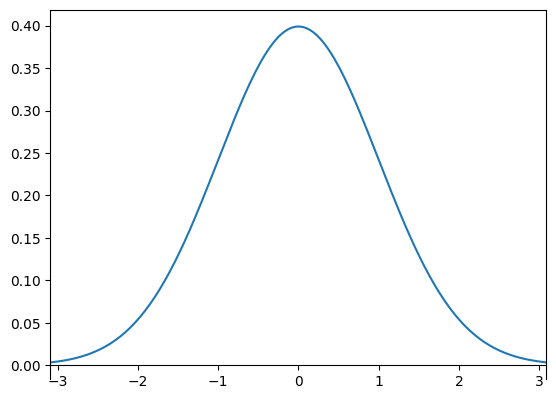

In [198]:
Normal().plot()

## The (General) Normal Distribution

표준 정규분포는 평균이 0이고 분산이 1인 분포이다. 일반적으로 우리는 아래의 두 항목을 할 수 있다.
- scale the bell shape to be as wide as we want, 
- shift the bell shape to be centered wherever we want.

만약 $Z$ 가 정규 분포(standard normal) 라면, 
$$ X = \mu + \sigma Z $$
는 $\text{Normal}(\mu, \sigma)$ 를 따른다.

여기에서 parameter $\mu$ 는 expected value이고, parameter $\sigma$ 는 표준 편차(standard deviation)이다. (따라서 $\sigma^2$ 는 variance이다.)

## Assignment 1
여러 개의 정규분포를 생성하여 비교하시오.

각 분포는 평균과 표준편차가 다르며, 이를 통해 **μ**이 분포의 중심 위치를 어떻게 바꾸는지, 그리고 **σ**가 분포의 폭과 모양을 어떻게 변화시키는지 확인할 수 있습니다.

다음 분포들을 한 그래프에 그려 서로 비교하라. 각 분포는 다른 색으로 표시하고 범례(legend)를 추가하시오.

- 평균 = 1, 표준편차 = 0.25
- 평균 = 1, 표준편차 = 0.5
- 평균 = 1, 표준편차 = 0.75
- 평균 = 3, 표준편차 = 0.25
- 평균 = 3, 표준편차 = 0.5
- 평균 = 3, 표준편차 = 0.75

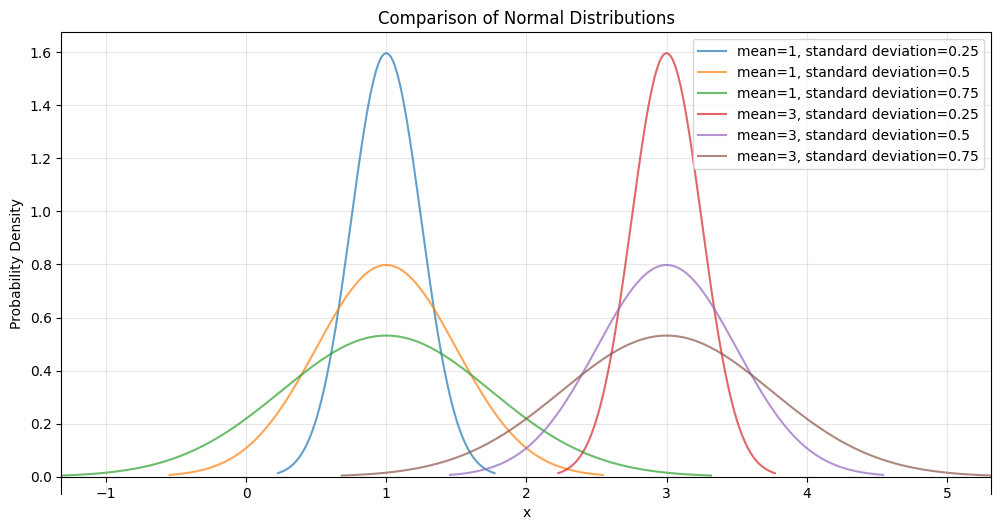

In [199]:
''' Assignment 1 '''

import matplotlib.pyplot as plt

distributions = [
    Normal(mean=1, sd=0.25),
    Normal(mean=1, sd=0.5), 
    Normal(mean=1, sd=0.75),
    Normal(mean=3, sd=0.25),
    Normal(mean=3, sd=0.5),
    Normal(mean=3, sd=0.75)
]

labels = [
    'mean=1, standard deviation=0.25',
    'mean=1, standard deviation=0.5',
    'mean=1, standard deviation=0.75', 
    'mean=3, standard deviation=0.25',
    'mean=3, standard deviation=0.5',
    'mean=3, standard deviation=0.75'
]

plt.figure(figsize=(12, 6))

for i, (dist, label) in enumerate(zip(distributions, labels)):
    dist.plot(alpha=0.7, label=label)

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Comparison of Normal Distributions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Probability

확률을 계산하기 위해서는 해당 구간에 대해 확률밀도함수(p.d.f.)를 적분한다. 예를 들어,

$$ P(Z \leq 1) = \int_{-\infty}^1 \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}\,dz. $$

우리가 이전에 공부한 다른 연속분포와 달리, 확률밀도함수 $p(z)$는 초등적(초등함수 형태의) 부정적분을 가지지 않는다. 이는 미적분에서 배운 기법만으로는 이 적분을 종이에 직접 계산할 수 없음을 의미한다. 따라서 수치적으로 계산해야 한다. 다행히, Symbulate을 사용하면 이를 쉽게 계산할 수 있다.

예를 들어, $P(Z \leq 1)$ 은 단순히 누적분포함수(c.d.f.)를 $1$ 에서 평가한 값이다. 표준 정규분포의 누적분포함수는 흔히 $\Phi(z)$로 표기된다. 따라서 우리는 $\Phi(1)$을 계산해야 한다.

In [200]:
Normal().cdf(1)

0.8413447460685429

## Assignment 2:

표준 정규분포 $Z∼N(0,1)$ 에 대하여, 확률 $P(−2<Z<2)$ 를 계산하시오.

힌트: 표준 정규분포의 누적분포함수(CDF, $Φ(z)$ )를 이용하여 구할 수 있다.

**파이썬의 Normal().cdf 함수를 사용하여 작성하시오.**

**그 외의 함수를 활용하면 0점 처리하겠습니다**

In [201]:
''' Assignment 2'''
# P(-2 < Z < 2) = P(Z < 2) - P(Z < -2)

print(Normal().cdf(2) - Normal().cdf(-2))


0.9544997361036416


# Monte Carlo Approximation 

## Example 1: Coin Flip Example

공정한 동전에서 앞면이 나올 확률은 $1/2$이다. 몬테카를로 방법을 사용하여 동전 던지기를 5000번 반복적으로 시뮬레이션하여, 앞면이나 뒷면이 나올 확률이 항상 $1/2$임을 확인한다.

<p align="center">
  <img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/CoinFlip.png" width="450"/>
</p>


In [202]:
import random
import numpy as np
import matplotlib.pyplot as plt
# ================== import requirement library ================== #

# coin flip function:
# 0 --> Head
# 1 --> Tail

def coin_flip():
  return random.randint(0, 1)

# check the output of coin_flip
for i in range(10):
  print('iteration' + str(i) + '--> ' + str(coin_flip()))

# Monte Carlo Simulation
list1= []

def monte_carlo(n):
  results = 0
  plt.axhline(y=0.5, color='r', linestyle='-')

  for i in range(n):
    flip_result = coin_flip()
    results = results + flip_result

    # calculate probabibility valuue
    prob_value = results / (i+1)

    # append probability to list1
    list1.append(prob_value)

    # plot results    
    plt.xlabel('iteration')
    plt.ylabel('probability')
    plt.plot(list1)

  return results / n

iteration0--> 1
iteration1--> 0
iteration2--> 0
iteration3--> 0
iteration4--> 1
iteration5--> 1
iteration6--> 0
iteration7--> 1
iteration8--> 1
iteration9--> 0


final value of probability:  0.5007


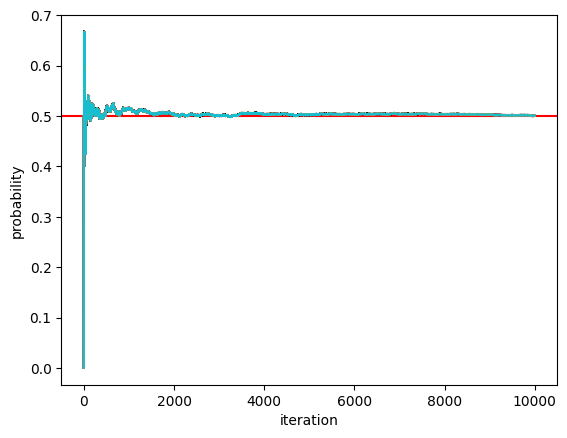

In [203]:
# call monte carlo functioin
answer = monte_carlo(10000)
print('final value of probability: ', answer)

# Example 2: Estimating Pi from Circle and Square

$\pi$ 값을 추정하기 위해, 우리는 원과 정사각형의 면적을 사용할 수 있다.

$$ \frac{Area \ Circle}{Area \ Square} = \frac{\pi*r^2}{2r * 2r}  $$
$$ \frac{Area \ Circle}{Area \ Square} = \frac{\pi}{4}  $$

따라서 $\pi$값은 다음 공식을 사용하여 추정할 수 있다.
$$ \pi = 4* \frac{Area \ Circle}{Area \ Square} $$

<p align="center">
<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/EstimatePiFromCircleSquare.png" width="350">
</p>

$$ r = 0.5 \text{라고\ 가정하면,} $$

$$ \text{length\_of\_field} = 2r = 1.0 $$



In [204]:
import turtle
from random import random 
import matplotlib.pyplot as plt
import math
# ================== import requirement library ================== #

# simulate raindrop 
# return x and y coordinates of raindrop

def rain_drop(length_of_field=1):
    """
    Simulate a random rain drop
    """
    return [(.5 - random()) * length_of_field, (.5 - random()) * length_of_field]

# check if raindrop fall in circle by using circle formula 

def is_point_in_circle(point, length_of_field=1):
    """
    Return True if point is in inscribed circle
    Use circle formula --> x^2 + y^2 <= r^2
    """
    return (point[0]) ** 2 + (point[1]) ** 2 <= (length_of_field / 2) ** 2

def plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field=1, format='pdf'):
    """ Function to draw rain drops """
    number_of_drops_in_circle = len(drops_in_circle)
    number_of_drops_out_of_circle = len(drops_out_of_circle)
    number_of_drops = number_of_drops_in_circle + number_of_drops_out_of_circle
    plt.figure()
    plt.xlim(-length_of_field / 2, length_of_field / 2)
    plt.ylim(-length_of_field / 2, length_of_field / 2)
    plt.scatter([e[0] for e in drops_in_circle], [e[1] for e in drops_in_circle], color='blue', label="Drops in circle")
    plt.scatter([e[0] for e in drops_out_of_circle], [e[1] for e in drops_out_of_circle], color='black', label="Drops out of circle")
    plt.legend(loc="center")
    plt.title("%s drops: %s landed in circle, estimating $\pi$ as %.4f." % (number_of_drops, number_of_drops_in_circle, 4 * number_of_drops_in_circle / number_of_drops))
    plt.savefig("%s_drops.%s" % (number_of_drops, format))

# simulate raindrop 
# return total number of raindrop in circle and in square

def rain(number_of_drops=1000, length_of_field=1, plot=True, format='pdf', dynamic=False):
    """
    Function to make rain drops.
    """
    number_of_drops_in_circle = 0
    drops_in_circle = []
    drops_out_of_circle = []
    pi_estimate = []
    for k in range(number_of_drops):
        d = (rain_drop(length_of_field))
        if is_point_in_circle(d, length_of_field):
            drops_in_circle.append(d)
            number_of_drops_in_circle += 1
        else:
            drops_out_of_circle.append(d)
        if dynamic:  # The dynamic option if set to True will plot every new drop (this can be used to create animations of the simulation)
            print("Plotting drop number: %s" % (k + 1))
            plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field, format)
        pi_estimate.append(4 * number_of_drops_in_circle / (k + 1))  # This updates the list with the newest estimate for pi.

    if plot and not dynamic:
        # Plot the pi estimates
        plt.figure()
        plt.scatter(range(1, number_of_drops + 1), pi_estimate)
        max_x = plt.xlim()[1]
        plt.hlines(math.pi, 0, max_x, color='black')
        plt.xlim(0, max_x)
        plt.title("$\pi$ estimate against number of rain drops")
        plt.xlabel("Number of rain drops")
        plt.ylabel("$\pi$")
        # plt.savefig("Pi_estimate_for_%s_drops_thrown.pdf" % number_of_drops)
        
        # If the plot option is passed and matplotlib is installed this plots
        # the final set of drops
        plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field, format)

    return [number_of_drops_in_circle, number_of_drops]



----------------------
500 drops
pi estimated as: 3.184 
----------------------


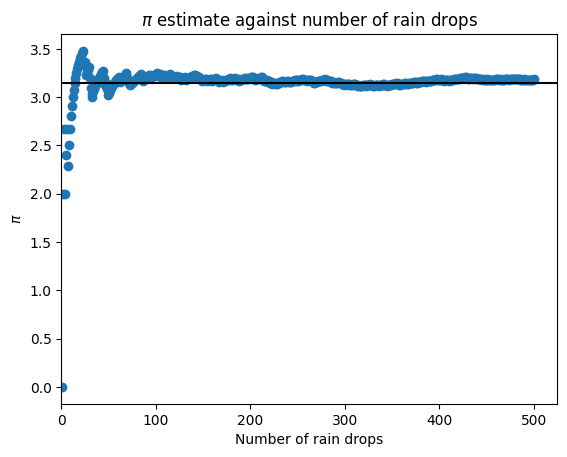

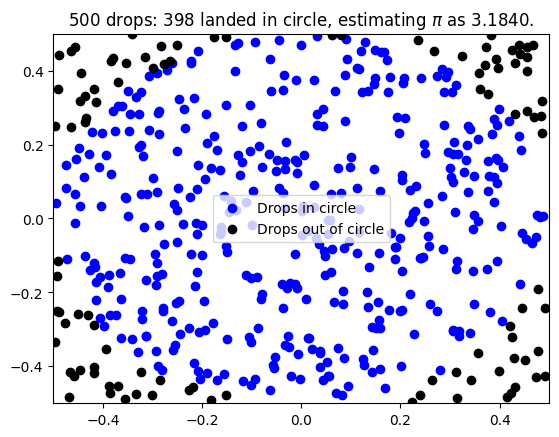

In [205]:
# call the function 
number_of_drops = 500
r = rain(number_of_drops, plot=True, format='png', dynamic=False)

print("----------------------")
print("%s drops" % number_of_drops)
print("pi estimated as: %s " % (4 * r[0] / r[1]))
print("----------------------")

## Assignment 3

몬테카를로(Monte Carlo) 시뮬레이션을 통해 원주율 $\pi$ 를 근사한다고 하자.

위의 코드 예제에서 number_of_drops 값을 점차 증가시키면서 추정된 $\pi$ 의 값을 확인하시오.

어느 정도의 number_of_drops에서 $\pi$ 값이 약 3.14에 수렴하기 시작하는지 기록하시오.

결과를 서술형으로 답변란에 작성하시오.

500 drops: pi estimated as: 3.24 
600 drops: pi estimated as: 3.18 
700 drops: pi estimated as: 3.0685714285714285 
800 drops: pi estimated as: 3.095 
900 drops: pi estimated as: 3.1866666666666665 
1000 drops: pi estimated as: 3.112 
1100 drops: pi estimated as: 3.1272727272727274 
1200 drops: pi estimated as: 3.13 
1300 drops: pi estimated as: 3.166153846153846 
1400 drops: pi estimated as: 3.1285714285714286 
1500 drops: pi estimated as: 3.2106666666666666 
1600 drops: pi estimated as: 3.135 
1700 drops: pi estimated as: 3.152941176470588 
1800 drops: pi estimated as: 3.1244444444444444 
1900 drops: pi estimated as: 3.1494736842105264 
2000 drops: pi estimated as: 3.164 
5000 drops: pi estimated as: 3.1528 
10000 drops: pi estimated as: 3.1416 
15000 drops: pi estimated as: 3.1482666666666668 
20000 drops: pi estimated as: 3.154 
25000 drops: pi estimated as: 3.1344 
30000 drops: pi estimated as: 3.1622666666666666 
35000 drops: pi estimated as: 3.1426285714285713 
40000 drops: pi e

'\n5000 drops: pi estimated as: 3.1256 \n10000 drops: pi estimated as: 3.1228 \n15000 drops: pi estimated as: 3.131466666666667 \n20000 drops: pi estimated as: 3.123 \n25000 drops: pi estimated as: 3.11936 \n30000 drops: pi estimated as: 3.1248 \n35000 drops: pi estimated as: 3.138857142857143 \n40000 drops: pi estimated as: 3.1394 \n45000 drops: pi estimated as: 3.1500444444444446 \n50000 drops: pi estimated as: 3.14904 \n55000 drops: pi estimated as: 3.128509090909091 \n60000 drops: pi estimated as: 3.1522 \n65000 drops: pi estimated as: 3.14 \n70000 drops: pi estimated as: 3.143485714285714 \n75000 drops: pi estimated as: 3.14 \n80000 drops: pi estimated as: 3.1455 \n85000 drops: pi estimated as: 3.139764705882353 \n90000 drops: pi estimated as: 3.1480444444444444 \n95000 drops: pi estimated as: 3.135494736842105 \n100000 drops: pi estimated as: 3.14096\n\n약 40000-50000번 이상 던지기 시작하면, 유의미하게 3.14에 근접하기 시작하며 이후부터는 거의 근접한 값으로 수렴했습니다.\n이를 통해, 몬테카를로 시뮬레이션을 통해 원주율을 근사할 때 횟수가 많을수록 3.14에 가까운

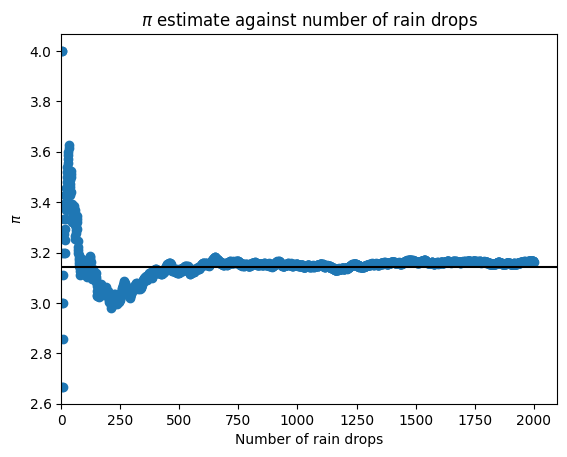

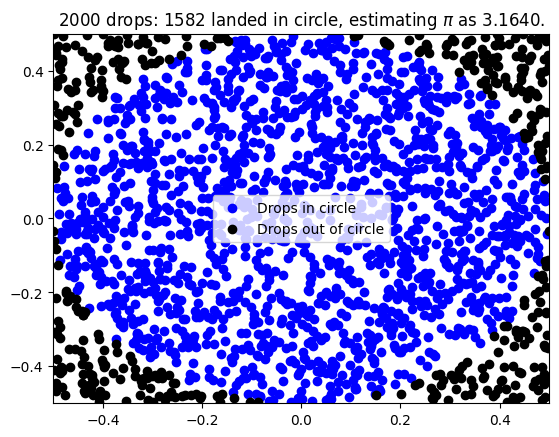

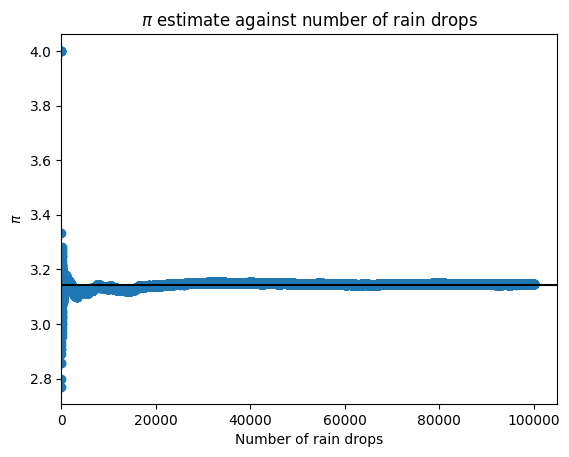

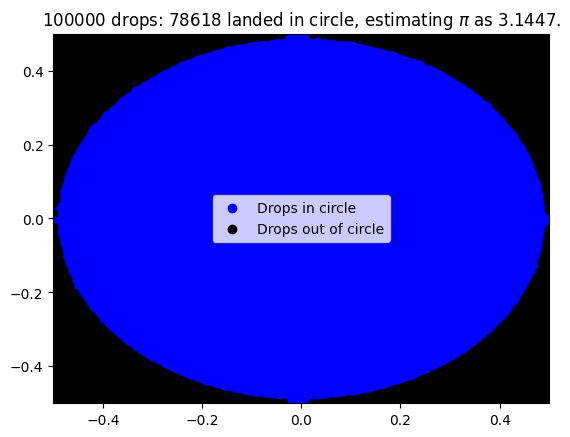

In [ ]:
''' Assignment 3 '''

## 실행
'''
500번 (기존 코드): 3.104
2000까지 100씩 증가시키면서 값이 어떻게 변화하는지 확인.
'''

for i in range(500, 2000 + 1, 100):
    # 마지막 loop에만 이미지 생성
    r = rain(i, plot=2000 == i, format='png', dynamic=False)
    print("%s drops: pi estimated as: %s " % (i, 4 * r[0] / r[1]))
    
'''
실행 결과:
500 drops: pi estimated as: 3.184 
600 drops: pi estimated as: 3.18 
700 drops: pi estimated as: 3.182857142857143 
800 drops: pi estimated as: 3.135 
900 drops: pi estimated as: 3.16 
1000 drops: pi estimated as: 3.16 
1100 drops: pi estimated as: 3.210909090909091 
1200 drops: pi estimated as: 3.17 
1300 drops: pi estimated as: 3.206153846153846 
1400 drops: pi estimated as: 3.145714285714286 
1500 drops: pi estimated as: 3.1173333333333333 
1600 drops: pi estimated as: 3.145 
1700 drops: pi estimated as: 3.131764705882353 
1800 drops: pi estimated as: 3.1822222222222223 
1900 drops: pi estimated as: 3.143157894736842 
2000 drops: pi estimated as: 3.12

횟수가 많아질 수록 3.14에 가까운 값의 빈도가 높아지나, 유의미한 결과는 아닌 것으로 보임.
전체 수행 횟수가 적어서인 것으로 추정하고, 5000부터 5000씩 증가시키면서 100000까지 더 많은 횟수를 확인.
'''

for i in range(5000, 100000 + 1, 5000):
    r = rain(i, plot=(i == 100000), format='png', dynamic=False)
    print("%s drops: pi estimated as: %s " % (i, 4 * r[0] / r[1])) 
    
'''
5000 drops: pi estimated as: 3.1256 
10000 drops: pi estimated as: 3.1228 
15000 drops: pi estimated as: 3.131466666666667 
20000 drops: pi estimated as: 3.123 
25000 drops: pi estimated as: 3.11936 
30000 drops: pi estimated as: 3.1248 
35000 drops: pi estimated as: 3.138857142857143 
40000 drops: pi estimated as: 3.1394 
45000 drops: pi estimated as: 3.1500444444444446 
50000 drops: pi estimated as: 3.14904 
55000 drops: pi estimated as: 3.128509090909091 
60000 drops: pi estimated as: 3.1522 
65000 drops: pi estimated as: 3.14 
70000 drops: pi estimated as: 3.143485714285714 
75000 drops: pi estimated as: 3.14 
80000 drops: pi estimated as: 3.1455 
85000 drops: pi estimated as: 3.139764705882353 
90000 drops: pi estimated as: 3.1480444444444444 
95000 drops: pi estimated as: 3.135494736842105 
100000 drops: pi estimated as: 3.14096

약 50000-60000번 이상 던지기 시작하면, 유의미하게 3.14에 근접하기 시작하며 이후부터는 거의 근접한 값으로 수렴했습니다.
이를 통해, 몬테카를로 시뮬레이션을 통해 원주율을 근사할 때 횟수가 많을수록 3.14에 가까운 값의 빈도가 높아지고, 확률에 대한 추정이 더 정확해짐을 확인할 수 있었습니다.
'''

# Multivariate Gaussian Distribution

두 연속 확률변수에 대하여, 시뮬레이션된 $ (x,y)$ 값을 이용해 결합확률밀도함수(joint probability density function)를 추정하고 이를 시각화하라.

### Example. Assume  <br>
mean of X = 1, mean of Y = 2 <br>
variance of X = 2, variance of Y = 4 <br>
covariance of xy and yx = 1

In [207]:
mu    = [1, 2]
Sigma = [[2, 1],
         [1, 4]]

X, Y = RV(MultivariateNormal(mean = mu, cov = Sigma))
Z = X + Y

# understand each output 

x = X.sim(10000)
y = Y.sim(10000)
z = Z.sim(10000)
print('X mean:', x.mean())
print('Y mean:', y.mean())
print('Z mean:', z.mean())
print('X variance:', x.sd()**2)
print('Y variance:', y.sd()**2)
print('Z variance:', z.sd()**2)

X mean: 1.0069464927031768
Y mean: 1.9910742110417556
Z mean: 2.97901820248352
X variance: 2.0147363768095565
Y variance: 4.038302129250163
Z variance: 7.994471355514715


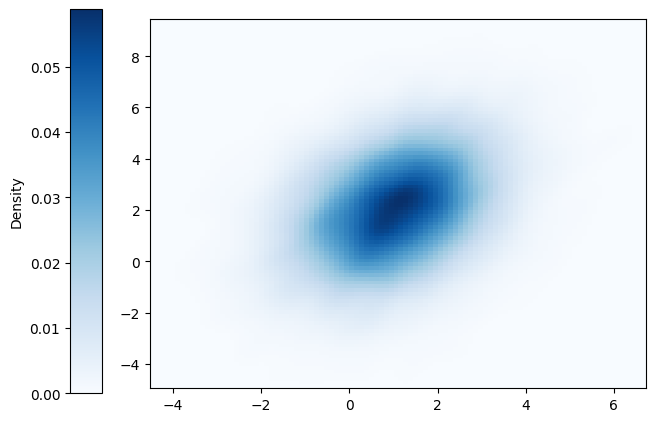

In [208]:
(X & Y).sim(10000).plot(type="density")

## Assignment 4

다변량 정규분포(Multivariate Gaussian)를 생성하시오.

- $X$ 의 분산은 2, 
- $Y$ 의 분산은 4로 설정한다.

아래 제시된 그림과 유사한 분포를 시각화하시오.

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/Exercise3_Multivariate_Image.png" width="512">

In [209]:
''' Assignment 4 '''

' Assignment 4 '

# Regularization 

여기서는 릿지 회귀(Ridge regression)에서 정규화 항이 과적합(overfitting)을 줄이는 데 어떻게 도움이 되는지를 살펴본다.

In [210]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error as mse

# generate 1d regression data 
def make_1dregression_data(n=21):
    np.random.seed(0)
    xtrain = np.linspace(0.0, 20, n)
    xtest = np.arange(0.0, 20, 0.1)
    sigma2 = 4
    w = np.array([-1.5, 1/9.])
    fun = lambda x: w[0]*x + w[1]*np.square(x)
    ytrain = fun(xtrain) + np.random.normal(0, 1, xtrain.shape) * \
        np.sqrt(sigma2)
    ytest= fun(xtest) + np.random.normal(0, 1, xtest.shape) * \
        np.sqrt(sigma2)
    return xtrain, ytrain, xtest, ytest


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import numpy as np
n=21
xtrain = np.linspace(0.0, 20, n)
w = np.array([-1.5, 1/9.])
fun = lambda x: w[0]*x + w[1]*np.square(x)

ytrain = fun(xtrain)

In [ ]:
# split data into train and test
xtrain, ytrain, xtest, ytest = make_1dregression_data(n=21)

#Rescaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
Xtrain = scaler.fit_transform(xtrain.reshape(-1, 1))
Xtest = scaler.transform(xtest.reshape(-1, 1))

# fit Ridge model with different regularizer strength
deg = 14
alphas = np.logspace(-10, 1.3, 10)  # Regularization strength
nalphas = len(alphas)
mse_train = np.empty(nalphas)
mse_test = np.empty(nalphas)
ytest_pred_stored = dict()


for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha, fit_intercept=False)
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)  # create 14 features which is used as X
    Xtrain_poly = poly_features.fit_transform(Xtrain)
    model.fit(Xtrain_poly, ytrain)
    ytrain_pred = model.predict(Xtrain_poly)
    Xtest_poly = poly_features.transform(Xtest)
    ytest_pred = model.predict(Xtest_poly)
    mse_train[i] = mse(ytrain_pred, ytrain) 
    mse_test[i] = mse(ytest_pred, ytest)
    ytest_pred_stored[alpha] = ytest_pred


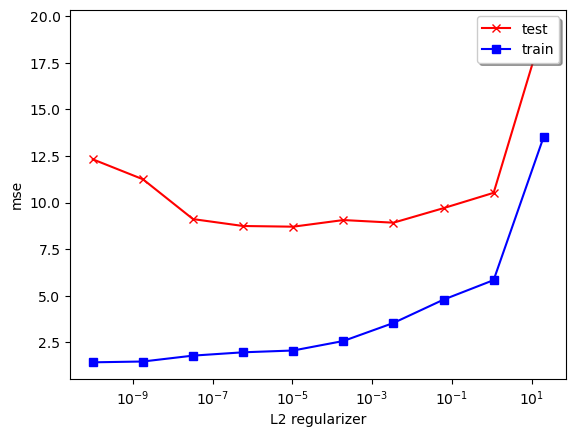

In [ ]:
# Plot MSE vs degree
fig, ax = plt.subplots()
mask = [True]*nalphas
ax.plot(alphas[mask], mse_test[mask], color = 'r', marker = 'x',label='test')
ax.plot(alphas[mask], mse_train[mask], color='b', marker = 's', label='train')
ax.set_xscale('log')
ax.legend(loc='upper right', shadow=True)
plt.xlabel('L2 regularizer')
plt.ylabel('mse')
plt.show()


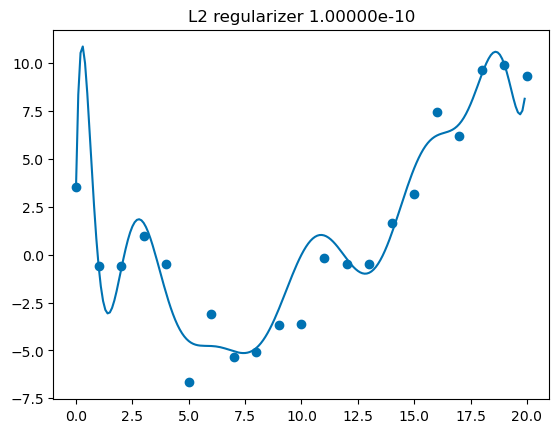

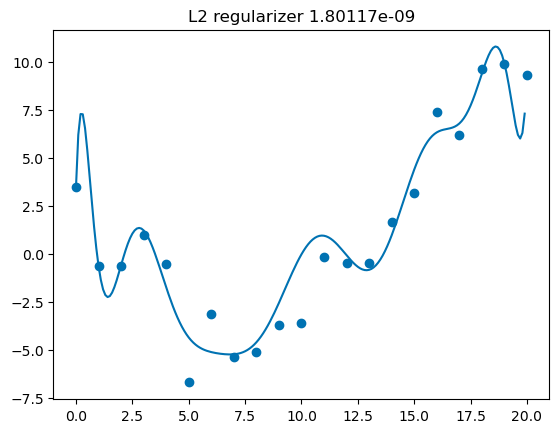

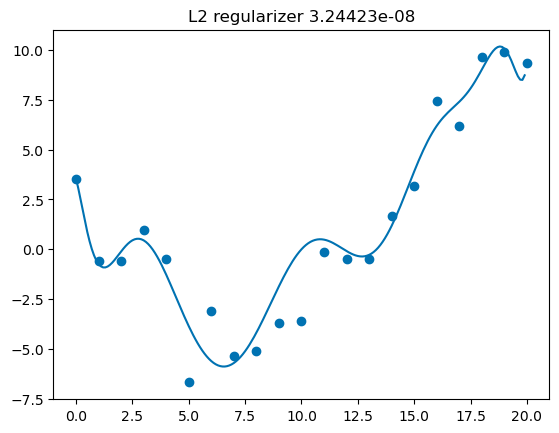

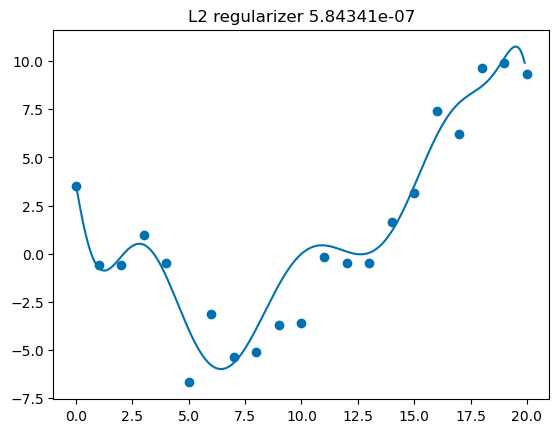

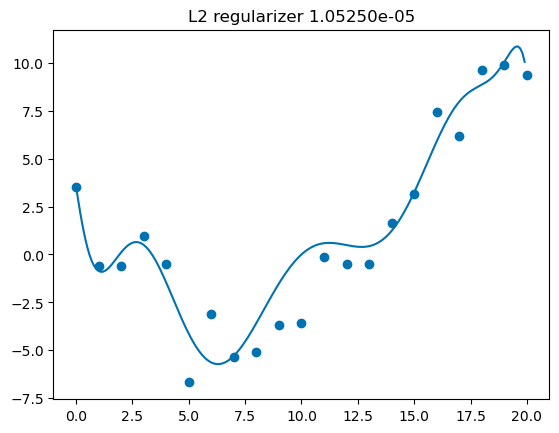

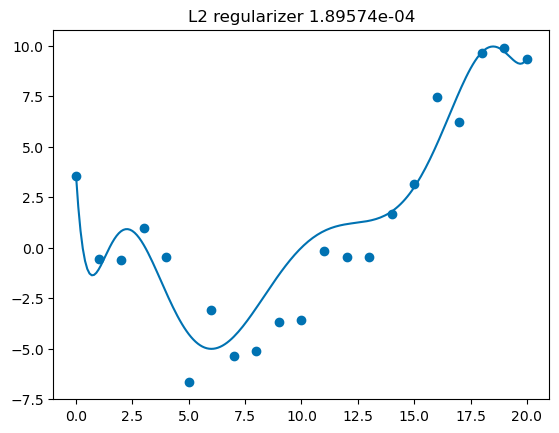

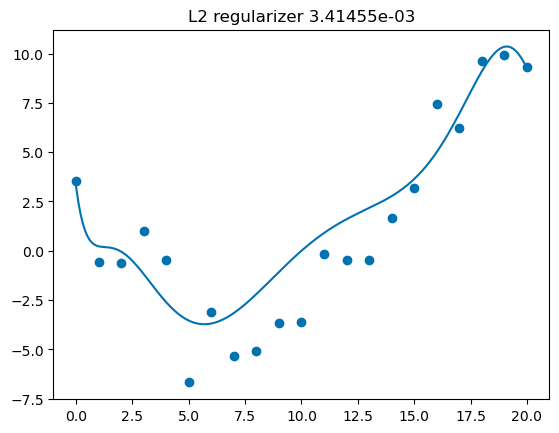

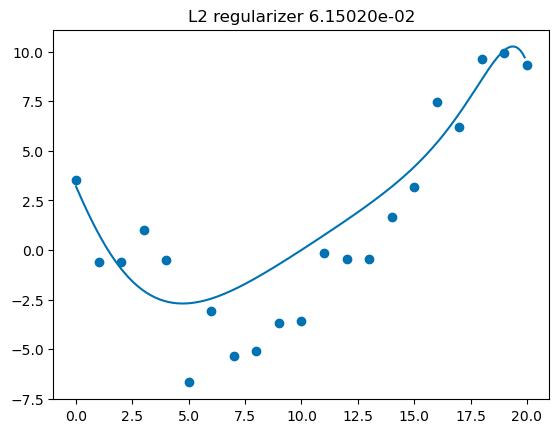

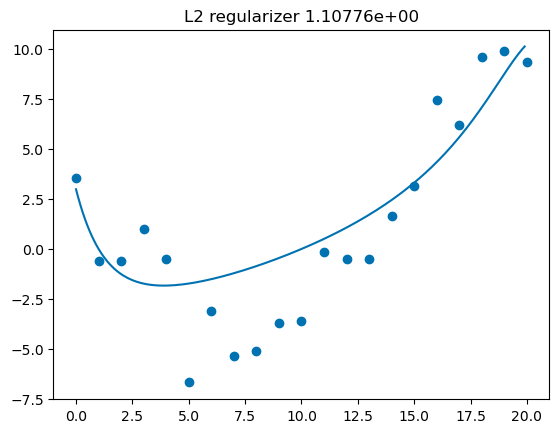

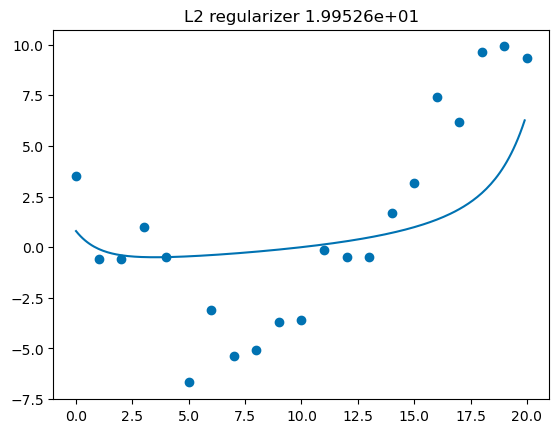

In [ ]:
# Plot fitted functions
chosen_alphas = alphas[[0,5,8]]
for i, alpha in enumerate(alphas):
    fig, ax = plt.subplots()
    ax.scatter(xtrain, ytrain)
    ax.plot(xtest, ytest_pred_stored[alpha])
    plt.title('L2 regularizer {:0.5e}'.format(alpha))
    plt.show()

## Assignment 5

- 모델 학습에서 **정규화 계수(regularizer strength)** 를 어떻게 선택하는 것이 최적인지 설명하시오.

- 정규화 계수가 너무 작을 때와 너무 클 때 각각 모델에 어떤 영향을 주는지 비교하시오.

- 최적의 정규화 계수를 찾기 위해 사용할 수 있는 방법(예: 검증 데이터셋 활용, 교차 검증 등)을 설명하시오.

아래 셀에 답변을 작성하시오.

In [ ]:
''' Assignment 5 '''

' Assignment 5 '